<style>
    .header {
        background: #f0f4fa;
        padding: 20px;
        border-radius: 12px;
        font-family: 'Segoe UI', sans-serif;
        text-align: center;
        box-shadow: 0 4px 8px rgba(0,0,0,0.08);
        max-width: 700px;
        margin: 30px auto;
    }

    .header h1 {
        font-size: 24px;
        color: #1a3c70;
        margin-bottom: 16px;
    }

    .header p {
        font-size: 16px;
        margin: 6px 0;
        color: #444;
    }
</style>

<div class="header">
    <h1>TCA Software Solutions | Análisis Exploratorio (EDA)</h1>
    <p>Pamela Cantú Rodríguez | A01285128</p>
    <p>Ana Sofía Ugalde Jiménez | A01702639</p>
    <p>Leslie Ramos Gutiérrez | A01562461</p>
    <p>Eder Gersahí Martínez León | A00831442</p>
    <p>Fernanda Alanis Montfort | A01721959</p>

</div>

<style>
    .section-title {
        background-color: #c0d7fa;
        padding: 12px 24px;
        border-radius: 12px;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        font-size: 20px;
        font-weight: 600;
        color: #1a3c70;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
        display: inline-block;
        margin: 16px 0;
    }
</style>

### <div class="section-title"> Librerías</div>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import math
from scipy.stats import normaltest
from pymannkendall import sens_slope

sns.set_theme(style='whitegrid')

<style>
    .section-title {
        background-color: #e1f0ff;
        padding: 16px 28px;
        border-radius: 14px;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        font-size: 22px;
        font-weight: 600;
        color: #1a3c70;
        box-shadow: 0 6px 10px rgba(0, 0, 0, 0.08);
        display: inline-block;
        margin: 20px 0;
        transition: transform 0.2s ease, box-shadow 0.2s ease;
    }

    .section-title:hover {
        transform: translateY(-2px);
        box-shadow: 0 10px 15px rgba(0, 0, 0, 0.1);
    }
</style>

### <div class="section-title"> Análisis exploratorio y limpieza de datos</div>

In [99]:
# importar los datos
df = pd.read_csv('iar_Reservaciones.csv')
#Revisar si se importaron los datos correctamente
df.head()

/var/folders/5c/s_dtyvpn5fq5szmlx39z00pr0000gn/T/ipykernel_68478/2085937616.py:2: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('iar_Reservaciones.csv')


,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,aa_h_num_per,h_num_adu,aa_h_num_adu,h_num_men,...,h_edo,h_codigop,h_correo_e,h_nom,h_tfa_total,aa_h_tfa_total,moneda_cve,h_ult_cam_fec,h_ult_cam_fec_ok,h_ult_cam_fec_okt
0,0,2019-08-16 00:00:00.000,20190816,2019-08-16,2019-08-16 00:00:00.000,2,0,2,0,0,...,EMX,01500,NaN,NaN,2659.98,0.0,1,20191110,2019-11-10,2019-11-10 00:00:00.000
1,1,2019-10-22 00:00:00.000,20191022,2019-10-22,2019-10-22 00:00:00.000,4,0,4,0,0,...,EGT,023541,NaN,NaN,1764.00,0.0,1,20191205,2019-12-05,2019-12-05 00:00:00.000
2,2,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,...,EMC,59800,NaN,NaN,2660.04,0.0,1,20191205,2019-12-05,2019-12-05 00:00:00.000
3,3,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,4,0,3,0,0,...,EGT,37219,NaN,NaN,1995.03,0.0,1,20191211,2019-12-11,2019-12-11 00:00:00.000
4,4,2019-10-28 00:00:00.000,20191028,2019-10-28,2019-10-28 00:00:00.000,2,0,2,0,0,...,EMX,15300,NaN,NaN,13369.92,0.0,1,20191212,2019-12-12,2019-12-12 00:00:00.000


#### **Limpieza de datos**

Se realizó un análisis exploratorio inicial utilizando **Data Wrangler**, con el objetivo de comprender la estructura del conjunto de datos, identificar valores atípicos, columnas irrelevantes y detectar problemas de calidad como valores nulos, inconsistencias o duplicados. A partir de este análisis se tomaron decisiones informadas para preparar los datos antes del modelado.    

Con base en los hallazgos, se diseñó una función de limpieza para depurar el DataFrame de reservaciones. A continuación se detallan las principales transformaciones realizadas:
*	**Eliminación de columnas irrelevantes:** Se identificaron múltiples variables que no aportaban valor al análisis, como identificadores únicos, correos, nombres, fechas duplicadas o versiones no estandarizadas. Estas columnas fueron eliminadas para reducir ruido y mejorar la interpretabilidad del modelo.
*	**Conversión de tipos de datos:** Algunas fechas estaban registradas como objects, por lo que se convirtieron al formato datetime para facilitar su manipulación y filtrado posterior.
*	**Depuración de variables históricas:** Se descartaron columnas que comenzaban con el prefijo aa_, ya que hacían referencia a años anteriores y no eran útiles para el análisis actual.
*	**Filtrado de registros inválidos:** Se excluyeron registros cuyo identificador de programa era igual a cero, ya que representaban menos del 1% del total y no aportaban información significativa. Del mismo modo, se seleccionaron únicamente las reservaciones con origen en el país identificado con el código 157, para asegurar consistencia geográfica.
*	**Eliminación de registros con valores inconsistentes:** Se descartaron las observaciones donde el número de personas, noches o habitaciones fuera cero, así como aquellas con tarifas negativas.
*	**Tratamiento de valores atípicos:** Se aplicó un criterio basado en el rango intercuartílico (IQR) para eliminar outliers tanto en la tarifa total como en el número de noches, asegurando que se mantuvieran valores representativos y sin distorsionar los resultados del análisis.
*	**Depuración de duplicados:** Se detectaron registros duplicados en el código de reserva, por lo que se conservaron únicamente los valores únicos (ignorando los que no contenían información). Dado que esta variable funcionaba como un identificador único, se eliminó posteriormente del conjunto final.
*	**Filtrado por fechas:** Finalmente, se incluyeron únicamente las reservaciones realizadas entre 2019 y una fecha límite definida por el usuario, con el fin de acotar el análisis a un periodo de interés y evitar sesgos temporales. En el caso del proyecto se utilizará el 31 de diciembre de 2019 con el ifn de evitar sesgos causado por la pandemia.


In [100]:
def clean_reservaciones(data:pd.DataFrame, fecha_limite: str) -> pd.DataFrame:

    #Eliminar columnas irrelevantes (se tomó la decisión con data wrangler)
    # Se eliminaron fechas que no se usan en el modelo
    # Se eliminaron columnas vacías y duplicadas 
    drop_cols = ['h_res_fec', 'h_res_fec_okt', 'h_fec_lld_okt', 'h_fec_lld', 'h_fec_reg', 
                 'h_fec_reg_okt', 'h_fec_sda', 'h_fec_sda_okt', 'h_nom', 'h_correo_e', 
                 'moneda_cve', 'h_ult_cam_fec', 'h_ult_cam_fec_okt', 'ID_Reserva', 
                 'Fecha_hoy', 'h_fec_reg_ok', 'h_res_fec_ok','h_ult_cam_fec_ok', 
                 'h_fec_sda_ok','Cliente_Disp', 'h_codigop', 'ID_empresa']
    data.drop(columns = [col for col in drop_cols if col in data.columns], inplace = True)

    #Cambiar las fechas de object a datetime
    data['h_fec_lld_ok'] = pd.to_datetime(data['h_fec_lld_ok'], errors='coerce')

    #Eliminar columnas con 'aa' (columnas del año anterior)
    data = data[data.columns.drop([col for col in data.columns if col.startswith('aa_')])]

    #Filtra por ID_programa (menos del 1% tiene ID_programa = 0)
    data = data[data['ID_Programa'] != 0]
    data.drop(columns=['ID_Programa'], inplace=True)

    # Filtrar filas con ID_Pais_Origen = 157
    data = data[data['ID_Pais_Origen'] == 157]
    data = data.drop(columns=['ID_Pais_Origen'])

    #Filtrar filas con número de noches, habitaciones, personas y la tarifa = 0
    data = data[(data['h_num_per'] > 0) & (data['h_num_noc'] > 0) & (data['h_tot_hab'] > 0) ]
    
    # Quitar outliers tarifa
    data = data[data['h_tfa_total'] >= 0]
    q1 = data['h_tfa_total'].quantile(0.25)
    q3 = data['h_tfa_total'].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    data = data[(data['h_tfa_total'] >= low) & (data['h_tfa_total'] <= high)]

    # Quitar outliers noches
    data = data[data['h_num_noc'] >= 0]
    q1 = data['h_num_noc'].quantile(0.25)
    q3 = data['h_num_noc'].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    data = data[(data['h_num_noc'] >= low) & (data['h_num_noc'] <= high)]

    # Reemplazar espacios por NaN y quitar duplicados en cod reserva (ignorando NaN)
    data['h_cod_reserva'] = data['h_cod_reserva'].replace(r'^\s*$', np.nan, regex = True)
    data = data[(~data['h_cod_reserva'].duplicated()) | data['h_cod_reserva'].isna()]
    # Elimar la columna al funcionar como un ID
    data.drop(columns=['h_cod_reserva'], inplace=True)

    # Incluir solo las reservas entre 2019 y 2021)
    data = data[(data['h_fec_lld_ok'] >= '2019-01-01') & (data['h_fec_lld_ok'] <= fecha_limite)]

    return data


 #### **Imputación de valores faltantes en la tarifa**

Una vez finalizada la limpieza del conjunto de datos, se detectaron registros con tarifa total igual a cero, los cuales no representaban casos válidos sino posibles datos faltantes o incorrectamente registrados.   

Para resolver este problema, se aplicó una técnica de imputación supervisada utilizando un modelo de regresión. El objetivo fue estimar de forma razonable la tarifa total de esas reservaciones, basándose en patrones presentes en los datos válidos.   

El proceso consistió en los siguientes pasos:
* **Codificación de variables categóricas:** Se transformaron las variables tipo texto en variables numéricas mediante codificación con LabelEncoder, excluyendo la variable de fecha para no distorsionar su interpretación temporal.
* **Separación de datos:** Se dividió el conjunto en dos grupos:   
	- Reservaciones con tarifa válida (≠ 0), utilizadas para entrenar el modelo   
	- Reservaciones con tarifa igual a cero, que serían imputadas   
* **Entrenamiento del modelo:** Se utilizó un modelo de Random Forest Regressor, entrenado con las observaciones válidas para predecir la tarifa total en función de las demás variables disponibles.
* **Predicción e imputación:** El modelo entrenado se usó para estimar las tarifas de las observaciones incompletas. Estas nuevas tarifas fueron agregadas al dataset, manteniendo la información temporal original.
* **Reconstrucción del dataset completo:** Finalmente, se combinaron las observaciones imputadas con las originales para obtener un nuevo conjunto de datos consistente y sin tarifas faltantes.

In [101]:
def imputar_tarifa(data: pd.DataFrame) -> pd.DataFrame:
    data = data.copy()

    # Guardar la columna de fecha como datetime 
    data['h_fec_lld_ok'] = pd.to_datetime(data['h_fec_lld_ok'])

    # Identificar columnas categóricas, excluyendo la fecha
    object_columns = data.select_dtypes(include=['object']).columns
    object_columns = [col for col in object_columns if col != 'h_fec_lld_ok']

    # Codificar columnas categóricas
    le = LabelEncoder()
    for col in object_columns:
        data[col] = le.fit_transform(data[col].astype(str))

    # Separar datos a imputar y válidos
    to_impute = data[data['h_tfa_total'] == 0].copy()
    data_valid = data[data['h_tfa_total'] != 0].copy()

    # Guardar fechas antes de eliminar
    fechas_to_impute = to_impute['h_fec_lld_ok']

    # Preparar X e y
    X = data_valid.drop(columns=['h_tfa_total', 'h_fec_lld_ok'])
    y = data_valid['h_tfa_total']

    # Entrenar modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Imputar
    X_to_impute = to_impute.drop(columns=['h_tfa_total', 'h_fec_lld_ok'])
    to_impute['h_tfa_total'] = model.predict(X_to_impute)

    # Restaurar la columna de fecha original
    to_impute['h_fec_lld_ok'] = fechas_to_impute

    # Concatenar
    final_df = pd.concat([data_valid, to_impute], ignore_index=True)

    # Asegurar tipo datetime y ordenar
    final_df['h_fec_lld_ok'] = pd.to_datetime(final_df['h_fec_lld_ok'])
  
    return final_df

#### **Agrupación por fecha**

La función agrupa todas las observaciones del conjunto de datos por la variable h_fec_lld_ok y suma los valores de la columna h_tfa_total, correspondiente a la tarifa total pagada. De esta manera, se obtiene un nuevo DataFrame que muestra el ingreso total generado por día.

In [102]:
def ingresos_por_fecha(data: pd.DataFrame) -> pd.DataFrame:
    """
    Agrupa los ingresos por fecha de llegada y devuelve un DataFrame con la suma de ingresos por fecha.
    """
    ingresos = data.groupby('h_fec_lld_ok', as_index = False)['h_tfa_total'].sum().sort_values('h_fec_lld_ok')
    return ingresos

#### **Análisis de datos iniciales** (antes de imputar la tarifa)

In [103]:
#Limpiar los datos e imputar la tarifa
df_clean = clean_reservaciones(df, '2019-12-31')

In [104]:
# Descripción de los datos
df_clean.describe()

,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,ID_Paquete,ID_Segmento_Comp,ID_Agencia,ID_Tipo_Habitacion,ID_canal,h_fec_lld_ok,Reservacion,ID_estatus_reservaciones,h_tfa_total
count,59072.000000,59072.00000,59072.000000,59072.000000,59072.000000,59072.000000,59072.000000,59072.000000,59072.000000,59072.000000,59072,59072.0,59072.000000,59072.000000
mean,2.395416,2.17890,0.055847,3.099218,1.003944,1.425041,12.716482,70.242839,13.693357,3.310723,2019-07-24 22:58:57.594799616,1.0,7.733562,7447.730842
min,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2019-02-05 00:00:00,1.0,1.000000,0.000000
25%,2.000000,2.00000,0.000000,2.000000,1.000000,1.000000,10.000000,33.000000,5.000000,1.000000,2019-05-12 00:00:00,1.0,9.000000,4438.000000
50%,2.000000,2.00000,0.000000,3.000000,1.000000,1.000000,14.000000,86.000000,17.000000,4.000000,2019-07-20 00:00:00,1.0,9.000000,7293.840000
75%,3.000000,2.00000,0.000000,4.000000,1.000000,2.000000,17.000000,99.000000,19.000000,4.000000,2019-10-13 00:00:00,1.0,9.000000,10441.005000
max,18.000000,15.00000,8.000000,7.000000,6.000000,5.000000,19.000000,132.000000,27.000000,13.000000,2019-12-31 00:00:00,1.0,9.000000,19495.000000
std,0.931795,0.71553,0.305767,1.401646,0.083927,0.504186,5.028613,38.030177,7.638959,3.032431,NaN,0.0,2.581880,4517.177637


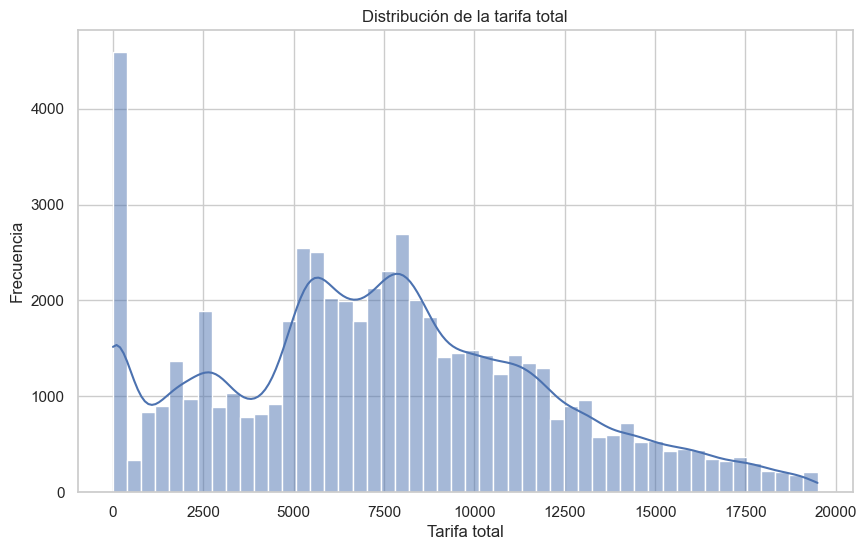

In [105]:
# Distribución de la tarifa total
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['h_tfa_total'], bins=50, kde=True)
plt.title('Distribución de la tarifa total')
plt.xlabel('Tarifa total')
plt.ylabel('Frecuencia')
plt.show()

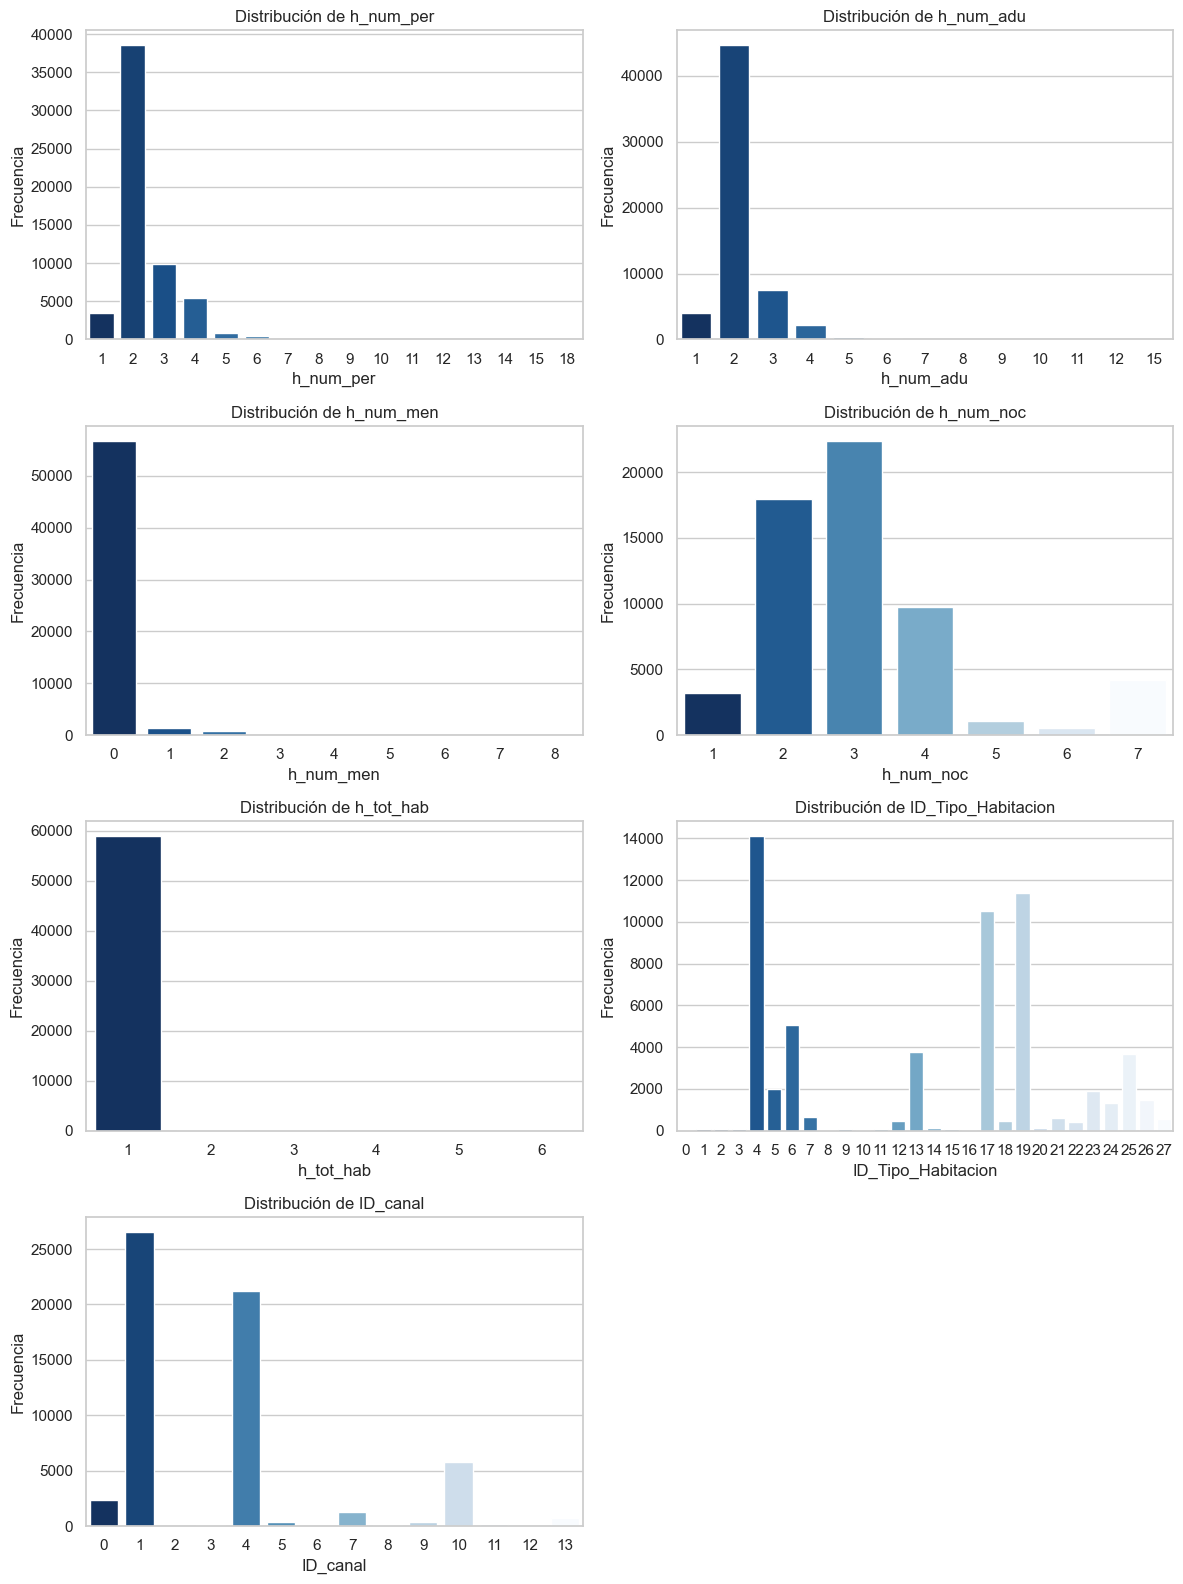

In [106]:
# Lista de variables categóricas numéricas que quieres visualizar
variables = ['h_num_per','h_num_adu', 'h_num_men', 'h_num_noc', 'h_tot_hab', 'ID_Tipo_Habitacion', 'ID_canal']

# Configuración general
n = len(variables)
n_cols = 2  # Número de columnas en el grid
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))  # Ajusta tamaño según número de gráficas

for i, var in enumerate(variables, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df_clean, x=var, hue=var, palette='Blues_r', legend=False)  # Fix aquí
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

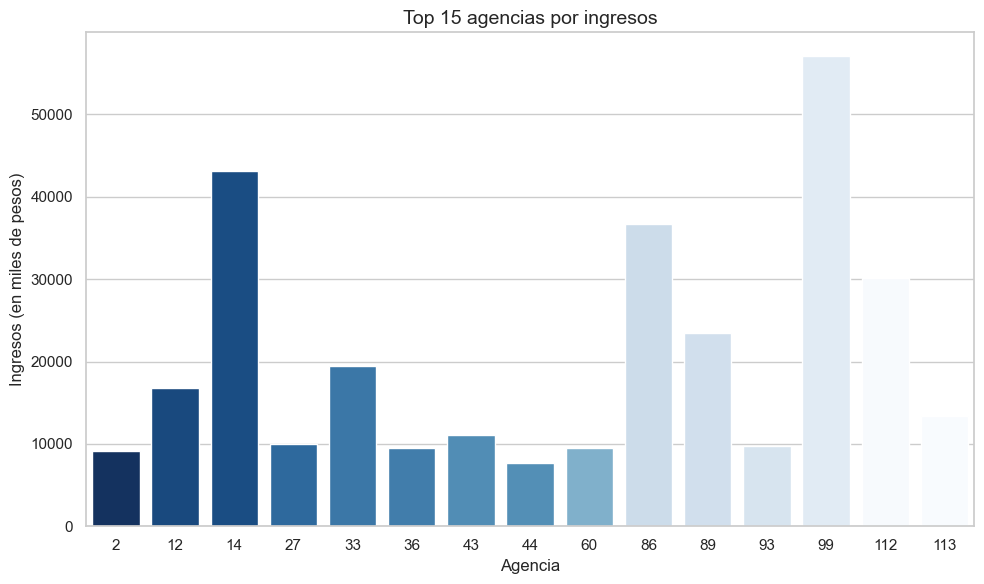

In [107]:
# Top 15 agencias por ingresos
agencia_col = 'ID_Agencia'

top_ingresos = (
    df_clean.groupby(agencia_col)['h_tfa_total']
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

# Convertir a miles para facilitar lectura
top_ingresos['ingresos_miles'] = top_ingresos['h_tfa_total'] / 1000

# Crear gráfica
plt.figure(figsize=(10, 6))
sns.barplot(data=top_ingresos, x=agencia_col, y='ingresos_miles', hue=agencia_col, palette='Blues_r')

# Títulos y etiquetas
plt.title('Top 15 agencias por ingresos', fontsize=14)
plt.ylabel('Ingresos (en miles de pesos)')
plt.xlabel('Agencia')
plt.tight_layout()
plt.legend().remove()
plt.show()

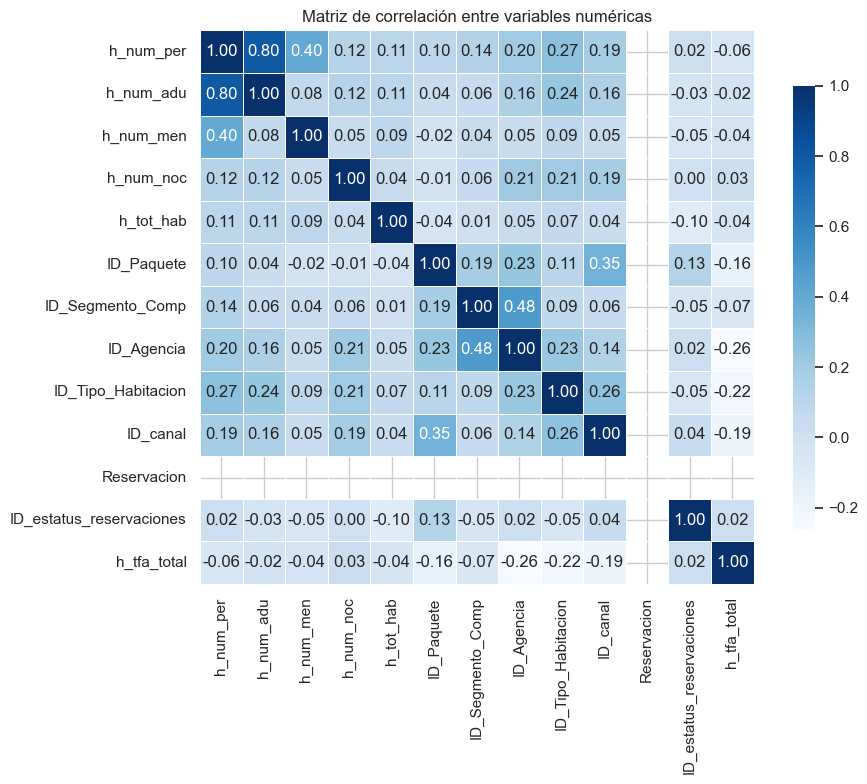

In [108]:
# Seleccionar solo variables numéricas
df_num = df_clean.select_dtypes(include='number')

# Calcular matriz de correlación
corr = df_num.corr()

# Graficar
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='Blues',  # Paleta de azules
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

#### **Imputación de Tarifa**

In [109]:
data = imputar_tarifa(df_clean)

In [110]:
data.describe()

,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,ID_Paquete,ID_Segmento_Comp,ID_Agencia,ID_Tipo_Habitacion,ID_canal,h_fec_lld_ok,Reservacion,ID_estatus_reservaciones,h_can_res,h_edo,h_tfa_total
count,59072.000000,59072.00000,59072.000000,59072.000000,59072.000000,59072.000000,59072.000000,59072.000000,59072.000000,59072.000000,59072,59072.0,59072.000000,59072.000000,59072.000000,59072.000000
mean,2.395416,2.17890,0.055847,3.099218,1.003944,1.425041,12.716482,70.242839,13.693357,3.310723,2019-07-24 22:58:57.594799360,1.0,7.733562,2.869092,62.330393,7874.743164
min,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2019-02-05 00:00:00,1.0,1.000000,0.000000,0.000000,0.080000
25%,2.000000,2.00000,0.000000,2.000000,1.000000,1.000000,10.000000,33.000000,5.000000,1.000000,2019-05-12 00:00:00,1.0,9.000000,0.000000,51.000000,4968.000000
50%,2.000000,2.00000,0.000000,3.000000,1.000000,1.000000,14.000000,86.000000,17.000000,4.000000,2019-07-20 00:00:00,1.0,9.000000,3.000000,70.000000,7560.000000
75%,3.000000,2.00000,0.000000,4.000000,1.000000,2.000000,17.000000,99.000000,19.000000,4.000000,2019-10-13 00:00:00,1.0,9.000000,3.000000,70.000000,10556.000000
max,18.000000,15.00000,8.000000,7.000000,6.000000,5.000000,19.000000,132.000000,27.000000,13.000000,2019-12-31 00:00:00,1.0,9.000000,13.000000,130.000000,19495.000000
std,0.931795,0.71553,0.305767,1.401646,0.083927,0.504186,5.028613,38.030177,7.638959,3.032431,NaN,0.0,2.581880,3.606090,21.747023,4203.496855


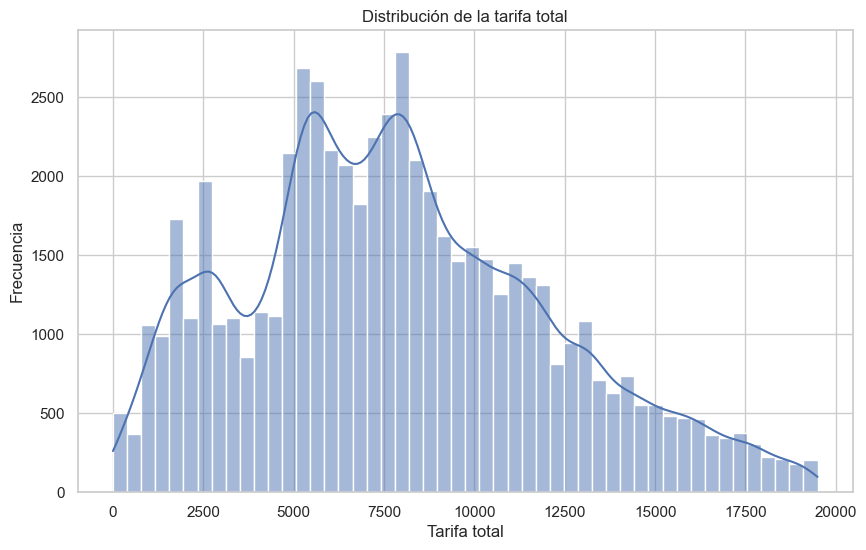

In [111]:
# Distribución de la tarifa total
plt.figure(figsize=(10, 6))
sns.histplot(data['h_tfa_total'], bins=50, kde=True)
plt.title('Distribución de la tarifa total')
plt.xlabel('Tarifa total')
plt.ylabel('Frecuencia')
plt.show()

In [112]:
#Definir series de tiempo
ingresos = ingresos_por_fecha(data)

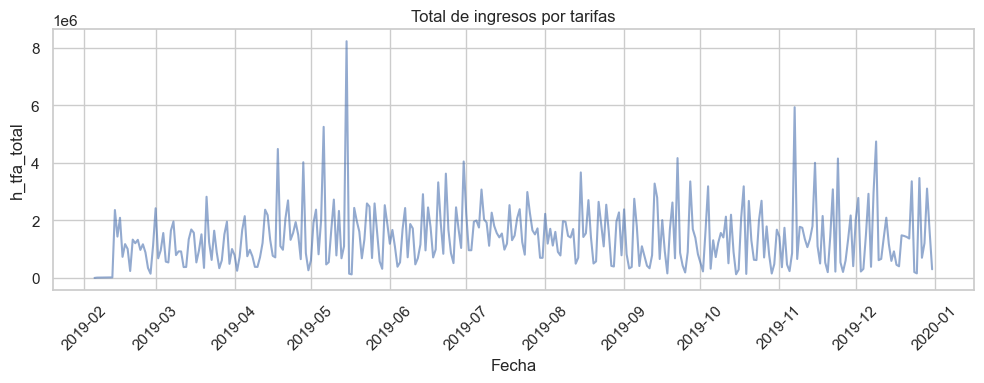

In [113]:
plt.figure(figsize=(10, 4))
plt.plot(ingresos['h_fec_lld_ok'], ingresos['h_tfa_total'], linestyle='-', alpha=0.6)
plt.title('Total de ingresos por tarifas')
plt.xlabel('Fecha')
plt.ylabel('h_tfa_total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Suavizado**

In [114]:
ingresos['smoothed'] = ingresos['h_tfa_total'].rolling(window=7).mean() #media movil simple
ingresos['smoothed2'] = ingresos['h_tfa_total'].ewm(span=7, adjust=False).mean() # Suavizado exponencial

Text(0.5, 0, 'Fecha')

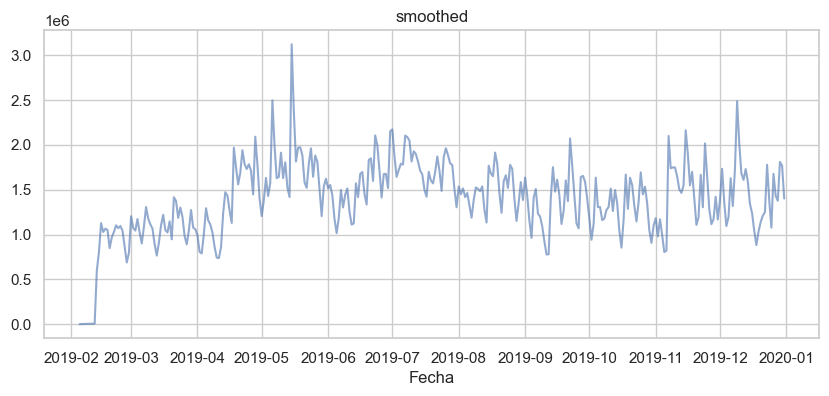

In [115]:
#Graficar después de suavizados
plt.figure(figsize=(10, 4))
plt.plot(ingresos['h_fec_lld_ok'], ingresos['smoothed2'], linestyle='-', alpha=0.6)
plt.title('smoothed')
plt.xlabel('Fecha')

#### **Pruebas de Hipótesis**

Se realizaron tres pruebas estadísticas con el objetivo de evaluar la naturaleza de la serie temporal de ingresos:
*	**Prueba de normalidad (D’Agostino-Pearson):**   
Los resultados indican que la serie no sigue una distribución normal (p < 0.05), por lo que se rechaza la hipótesis nula de normalidad.
*	**Prueba de tendencia (Mann-Kendall):**    
Se identificó una tendencia significativa en la serie, lo que sugiere una evolución sistemática en el comportamiento de los ingresos a lo largo del tiempo.
*	**Evaluación de estacionalidad (autocorrelación):**    
Se observaron autocorrelaciones significativas en lags específicos (por ejemplo, lag 7), lo que evidencia la presencia de patrones estacionales recurrentes.    

Dado que el modelo Prophet no requiere que los datos sean normales y está diseñado específicamente para manejar series con tendencia y estacionalidad, se concluye que es un modelo adecuado para esta serie temporal.

In [116]:
# Prueba de normalidad

stat, p = normaltest(ingresos['h_tfa_total'])
print(f'Estadístico: {stat:.3f}, p-valor: {p:.3f}')

if p < 0.05:
    print("Rechazamos H0: los datos NO son normales.")
else:
    print("No se puede rechazar H0: los datos podrían ser normales.")

Estadístico: 140.080, p-valor: 0.000
Rechazamos H0: los datos NO son normales.


In [117]:
# Prueba de estacionalidad

# Calcular autocorrelación hasta 30 días
acf_vals = acf(ingresos['h_tfa_total'], nlags=31)

# lag 7 para estacionalidad semanal
acf_lag_7 = acf_vals[7]

print(f"Autocorrelación en lag 7: {acf_lag_7:.3f}")

# Interpretación
if abs(acf_lag_7) > 0.3:
    print("Rechazamos H0: hay evidencia de estacionalidad semanal.")
else:
    print("No se puede rechazar H0: no hay evidencia clara de estacionalidad en lag 7.")

Autocorrelación en lag 7: 0.315
Rechazamos H0: hay evidencia de estacionalidad semanal.


In [118]:
#Prueba de tendencia

slope, intercept = sens_slope(ingresos['h_tfa_total'])

print(f"Slope: {slope}")
if abs(slope) > 0.01:  # Umbral arbitrario, puedes ajustar
    print("Existe una pendiente significativa según Sen's slope.")
else:
    print("La pendiente según Sen's slope es muy baja, no hay tendencia clara.")

Slope: 270.8003452528226
Existe una pendiente significativa según Sen's slope.


#### **Descomposición Temporal**

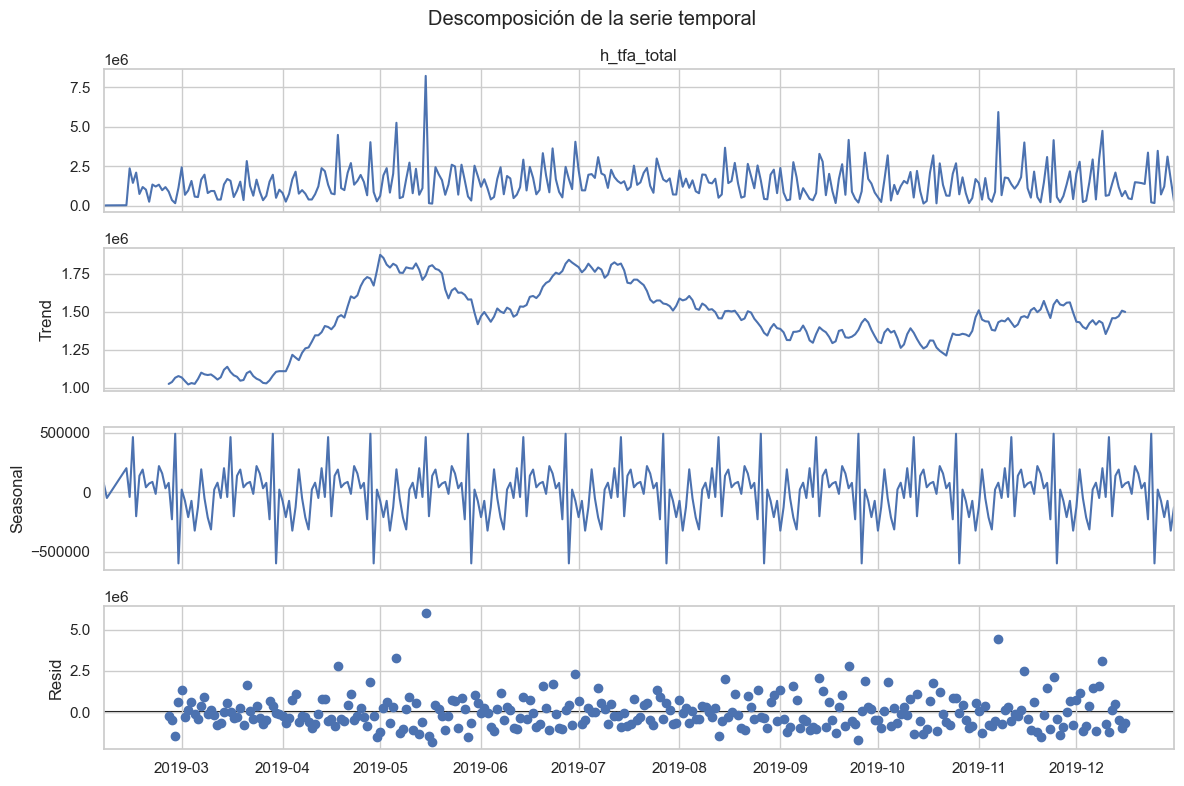

<Figure size 3500x500 with 0 Axes>

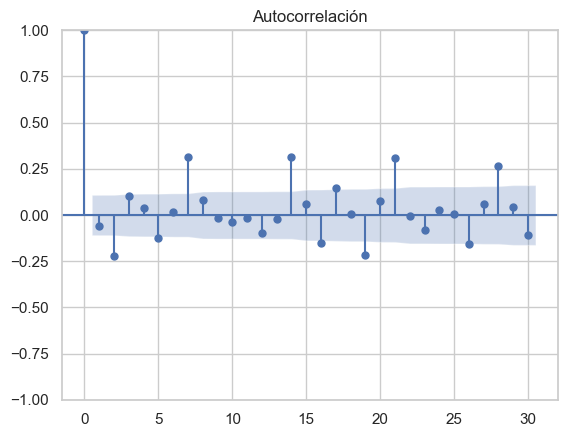

In [119]:
ingresos.set_index('h_fec_lld_ok', inplace = True)

# Descomposición de la serie temporal
result = seasonal_decompose(ingresos['h_tfa_total'], model = 'additive', period = 30)
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Descomposición de la serie temporal')
plt.tight_layout()
plt.show()

# Autocorrelación
plt.figure(figsize=(35,5))
plot_acf(ingresos['h_tfa_total'].dropna(), lags = 30)
plt.title('Autocorrelación')
plt.show()

ingresos.reset_index(inplace = True)